In [102]:
import sys
sys.path.append('./dip-ct-benchmark')
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import numpy as np
import matplotlib
from dival.measure import PSNR, SSIM
from dliplib.utils.helper import set_use_latex
from dival.util.plot import plot_images
import matplotlib.pyplot as plt
import pydicom
plt.rcParams.update({'font.size': 12})
plt.style.use('default')
set_use_latex()
np.random.seed(9527)

### ROI Setting 

In [ ]:
top_x1, top_x2 = 140, 130
top_y1, top_y2 = 200, 270
width1, width2 = 100, 100
height1, height2 = 80, 40
rect1 = plt.Rectangle((top_x1, top_y1), width1, height1, fill=False, edgecolor = 'red',linewidth=1)

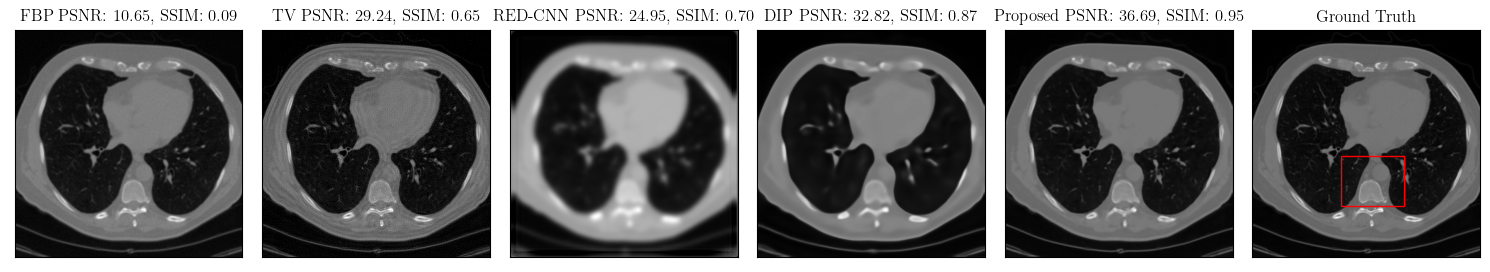

In [103]:
data_path = './layers30/reco_lodopab_dose50000_ang1000_sample9/'
red_cnn = './RED_CNN/lodopab/5e4/RED_CNN_0.npy'
prefix = data_path.split('/')[-2]
data = np.load(data_path + 'recos.npy', allow_pickle=True).item()
gt = np.load(data_path + 'gt.npy')
fbp = data['FBPReconstructor']
tv = data['TVReconstructor']
dip = data['DeepImagePriorReconstructor']
ours = data['Ours']
RED_CNN = np.load(red_cnn)
_, ax = plot_images([fbp, tv, RED_CNN, dip, ours, gt], vrange='individual',
                     xticks=[], yticks=[], cbar='none', fig_size=[15, 3])
ax[0].set_title('FBP PSNR: {:.2f}, SSIM: {:.2f}'.format(PSNR(fbp, gt), SSIM(fbp, gt)))
ax[1].set_title('TV PSNR: {:.2f}, SSIM: {:.2f}'.format(PSNR(tv, gt), SSIM(tv, gt)))
ax[2].set_title('RED-CNN PSNR: {:.2f}, SSIM: {:.2f}'.format(PSNR(RED_CNN, gt), SSIM(RED_CNN, gt)))
ax[3].set_title('DIP PSNR: {:.2f}, SSIM: {:.2f}'.format(PSNR(dip, gt), SSIM(dip, gt)))
ax[4].set_title('Proposed PSNR: {:.2f}, SSIM: {:.2f}'.format(PSNR(ours, gt), SSIM(ours, gt)))
ax[5].set_title('Ground Truth')
ax[5].add_patch(rect1)
plt.tight_layout()
plt.savefig(data_path + '{}.pdf'.format(prefix))

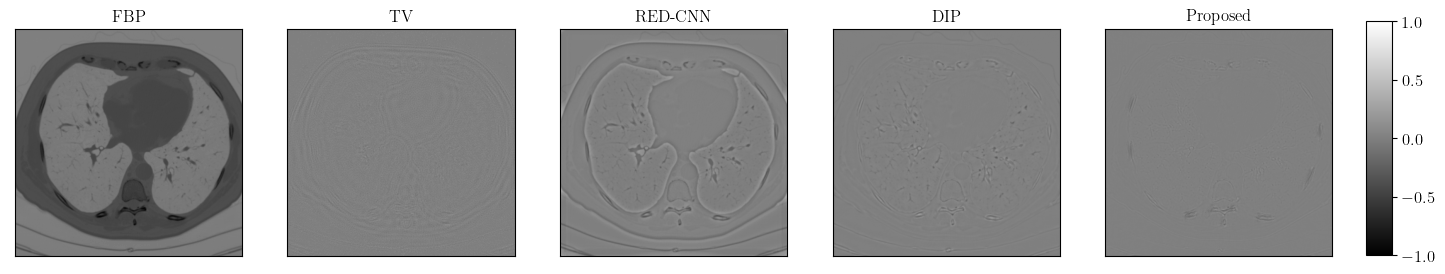

In [105]:
fig, ax = plt.subplots(1, 5, figsize=(17,3))
fig.subplots_adjust(right=0.9)
norm = matplotlib.colors.Normalize(vmin=-1, vmax=1)
cmap = 'gray'
im = ax[0].imshow(np.flip(np.rot90(fbp-gt, k=-1), axis=1),cmap=cmap, norm=norm)
ax[0].set_title('FBP')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(np.flip(np.rot90(tv-gt, k=-1), axis=1), cmap=cmap, norm=norm)
ax[1].set_title('TV')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].imshow(np.flip(np.rot90(RED_CNN-gt, k=-1), axis=1),cmap=cmap, norm=norm)
ax[2].set_title('RED-CNN')
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[3].imshow(np.flip(np.rot90(dip-gt, k=-1), axis=1),cmap=cmap, norm=norm)
ax[3].set_title('DIP')
ax[3].set_xticks([])
ax[3].set_yticks([])
ax[4].imshow(np.flip(np.rot90(ours-gt, k=-1), axis=1),cmap=cmap, norm=norm)
ax[4].set_title('Proposed')
ax[4].set_xticks([])
ax[4].set_yticks([])
position = fig.add_axes([0.92, 0.12, 0.015, .78 ])  
fig.colorbar(im, cax=position)
plt.savefig(data_path + '{}_residual.pdf'.format(prefix))

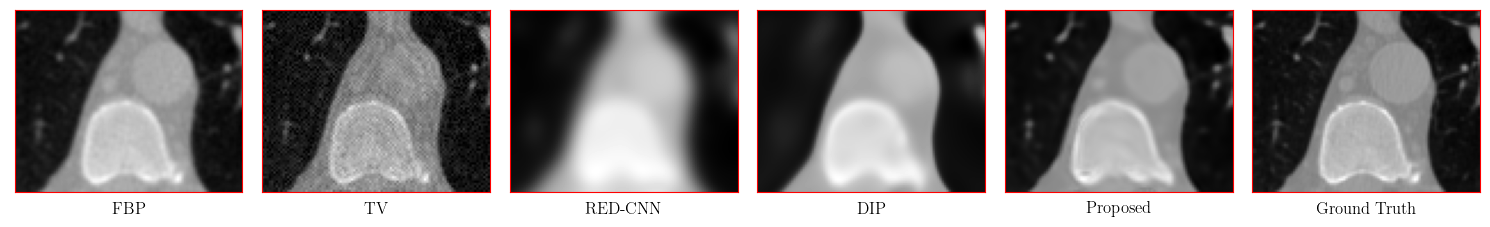

In [106]:
_, ax = plot_images([fbp[top_x1 : top_x1 + width1, top_y1:top_y1 + height1], 
                     tv[top_x1 : top_x1 + width1, top_y1:top_y1 + height1],
                     RED_CNN[top_x1 : top_x1 + width1, top_y1:top_y1 + height1],                
                     dip[top_x1 : top_x1 + width1, top_y1:top_y1 + height1],
                     ours[top_x1 : top_x1 + width1, top_y1:top_y1 + height1], 
                     gt[top_x1 : top_x1 + width1, top_y1:top_y1 + height1]],
                     nrows=1,
                     xticks=[], 
                     yticks=[], 
                    vrange='individual',
                    cbar='none',
                    fig_size=(15, 3))
ax[0].set_xlabel('FBP')
ax[1].set_xlabel('TV')
ax[2].set_xlabel('RED-CNN')
ax[3].set_xlabel('DIP')
ax[4].set_xlabel('Proposed')
ax[5].set_xlabel('Ground Truth')
ax[0].spines[:].set_color('red')
ax[1].spines[:].set_color('red')
ax[2].spines[:].set_color('red')
ax[3].spines[:].set_color('red')
ax[4].spines[:].set_color('red')
ax[5].spines[:].set_color('red')
plt.tight_layout()
plt.savefig(data_path + '{}_ROI.pdf'.format(prefix))